In [1]:
#@title 구글 드라이브 연동

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#@title 구글드라이브 파일 코랩에 가져오기

!gdown https://drive.google.com/uc?id=이곳에 붙여넣으시오

Downloading...
From (original): https://drive.google.com/uc?id=174pitX1IkwFkG3Hwek3o_-iOS2WY1g-4
From (redirected): https://drive.google.com/uc?id=174pitX1IkwFkG3Hwek3o_-iOS2WY1g-4&confirm=t&uuid=26dea979-79ab-41c1-9e42-6587b40d9d93
To: /content/dogs-vs-cats.zip
100% 856M/856M [00:13<00:00, 65.2MB/s]


In [3]:
#@title 가져온 파일 압축 풀기

!unzip dogs-vs-cats.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: t

In [4]:

#@title 라이브러리 다운로드

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import os
import shutil
from keras import regularizers
from keras import optimizers
!pip install pydot
!brew install graphviz
from keras.utils import plot_model
import datetime
from tensorflow.keras.callbacks import TensorBoard

/bin/bash: line 1: brew: command not found


In [5]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

In [6]:

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(3001, 4501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(4502, 6002)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(3001, 4501)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(4502, 6002)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [ ]:
base_dir = '/content/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수: ', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수: ', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수: ', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수: ', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 3000
훈련용 강아지 이미지 전체 개수: 3000
검증용 고양이 이미지 전체 개수:  1500
검증용 강아지 이미지 전체 개수:  1500
테스트용 고양이 이미지 전체 개수:  1500
테스트용 강아지 이미지 전체 개수:  1500


# 1차시 마지막.

In [ ]:
#@title 이미지 파일 경로 설정

train_dir = '/content/cats_and_dogs_small/train'
validation_dir = '/content/cats_and_dogs_small/validation'
test_dir = '/content/cats_and_dogs_small/test'

In [ ]:
#@title 이미지 파일 전처리 옵션 설정
#흑백 장점 컴퓨터의 학습 속도 증가, 불필요 정보 제거.일반화 성능 향상
#흑백 단점 컬러 정보 손실, 시각적 정보 제한, 다양성 감소


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#@title 이미지 파일 불러오기

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


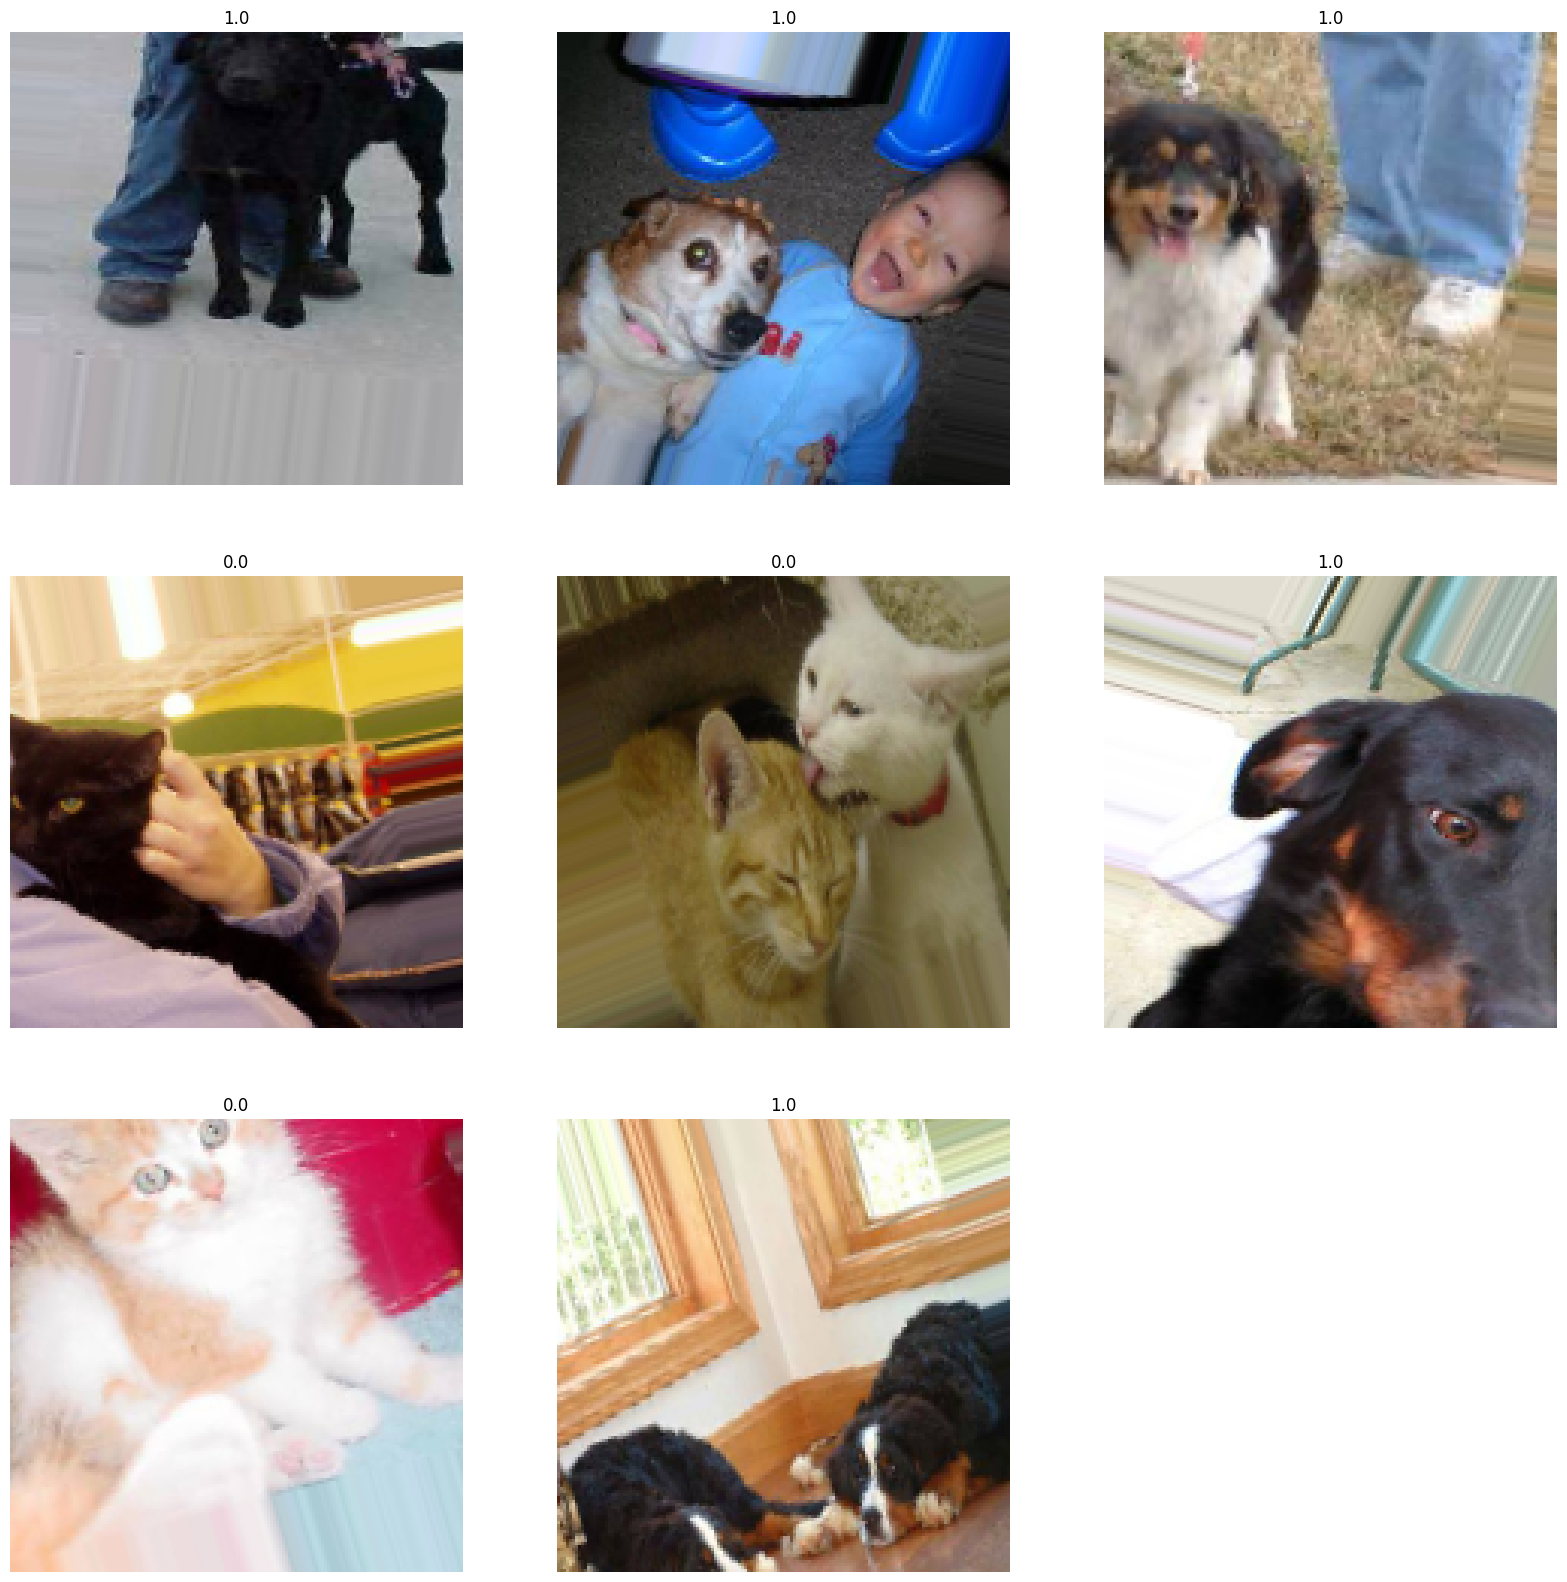

In [ ]:
#@title 전처리된 사진 보기

img, label = next(train_generator)
plt.figure(figsize=(20, 20))

for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.imshow(img[i])
    plt.title(label[i])
    plt.axis('off')

plt.show()

In [ ]:
#@title 모델 구성

model = models.Sequential()

Conv2D(1, (2, 2), padding='same', input_shape=(150, 150, 3))
model.add(layers.Conv2D(512, (2, 2), activation='sigmoid')) #512 = 레이어의 수 12,12= 가져올 이미지의 범위


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2))) #2,2 뽑아갈 이미지의 범위 max 폴링 이미지 픽셀의 최댓값을 가져감
model.add(layers.Conv2D(256, (4, 4), activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (4, 4), activation='relu' ))


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (2, 2), activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.Flatten())


model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3)) #0.3 노드를 삭제할 비율
model.add(layers.Dense(512, activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))



model.add(layers.Dense(1, activation='sigmoid'))

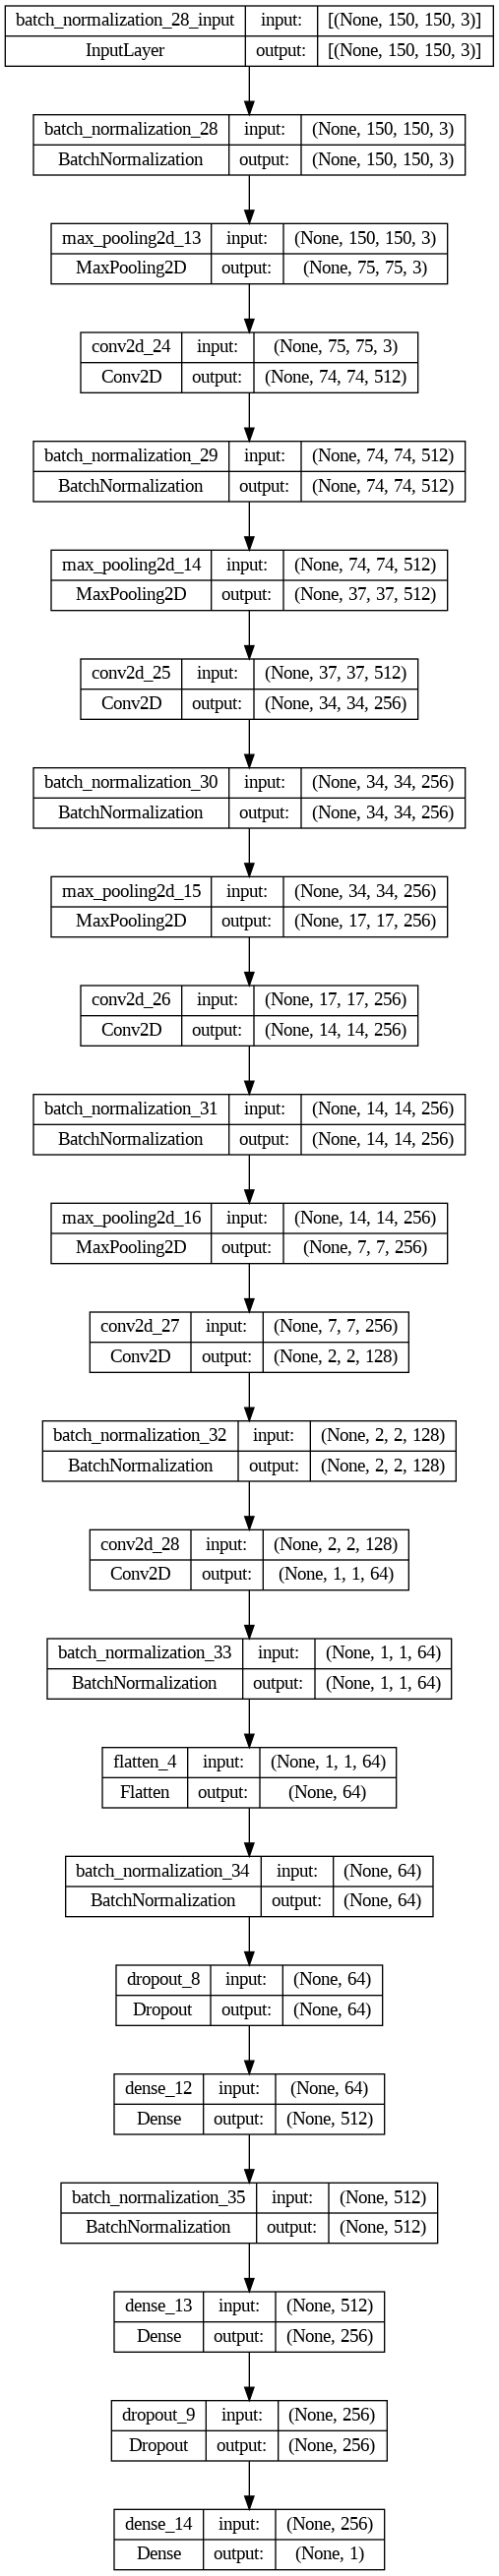

In [ ]:
#@title 생성 모델 시각화 하기

model = models.Sequential()


model.add(layers.BatchNormalization(input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (2, 2), activation='sigmoid')) #512 = 레이어의 수 12,12= 가져올 이미지의 범위


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2))) #2,2 뽑아갈 이미지의 범위 max 폴링 이미지 픽셀의 최댓값을 가져감
model.add(layers.Conv2D(256, (4, 4), activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (4, 4), activation='relu' ))


model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (6, 6), activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (2, 2), activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.Flatten())


model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3)) #0.3 노드를 삭제할 비율
model.add(layers.Dense(512, activation='relu'))


model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))



model.add(layers.Dense(1, activation='sigmoid'))

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [ ]:
#@title 모델 컴파일


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
# 로그 디렉토리 설정
log_dir = "/content/AImodel"

# TensorBoard 콜백 설정
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
#@title 모델 학습
#loss 손실: 오차 낮을수록 좋음
#acc 정확도: 높을 수록 좋음

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[tensorboard_callback]
      )

<ipython-input-21-ea0f02fe3628>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200
100/100 [==============================] - 62s 434ms/step - loss: 0.8923 - acc: 0.5132 - val_loss: 0.7605 - val_acc: 0.5063
Epoch 2/200
100/100 [==============================] - 43s 430ms/step - loss: 0.8066 - acc: 0.5359 - val_loss: 0.9509 - val_acc: 0.5181
Epoch 3/200
100/100 [==============================] - 43s 430ms/step - loss: 0.7603 - acc: 0.5572 - val_loss: 0.7414 - val_acc: 0.5025
Epoch 4/200
100/100 [==============================] - 46s 459ms/step - loss: 0.7227 - acc: 0.5864 - val_loss: 0.6512 - val_acc: 0.6144
Epoch 5/200
100/100 [==============================] - 44s 441ms/step - loss: 0.6965 - acc: 0.5766 - val_loss: 0.6694 - val_acc: 0.5813
Epoch 6/200
100/100 [==============================] - 38s 380ms/step - loss: 0.6712 - acc: 0.6212 - val_loss: 0.6417 - val_acc: 0.6394
Epoch 7/200
100/100 [==============================] - 42s 424ms/step - loss: 0.6500 - acc: 0.6247 - val_loss: 0.6212 - val_acc: 0.6575
Epoch 8/200
100/100 [===========================

In [ ]:
#@title 평가 데이터를 사용해 실제 정확도 측정

test_loss, test_acc = model.evaluate(test_generator, steps=100)
print('test acc:', test_acc)

In [ ]:
#@title 만들어진 모델 저장

tf.saved_model.save(model, "/content/AImodel")

In [ ]:
#@title 저장된 모델 불러오기

model = tf.saved_model.load('/content/AImodel')

In [ ]:
log_dir = "/content/AImodel" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {log_dir}

In [ ]:
!mkdir models